In [1]:
%reload_ext autoreload
%autoreload 2

In [7]:
import xarray as xa

from esgpull.config import Paths
from esgpull.esgpullplus import regrid

# get data directory from Paths
paths = Paths()

test_fp = paths.data / "CMIP6/ScenarioMIP/AS-RCEC/TaiESM1/ssp126/r1i1p1f1/Omon/so/gn/v20201125/so_Omon_TaiESM1_ssp126_r1i1p1f1_gn_201501-201512.nc"
test_ds = xa.open_dataset(test_fp)
test_ds

<xarray.Dataset> Size: 364MB
Dimensions:             (time: 12, bnds: 2, lev: 60, j: 384, i: 320, vertices: 4)
Coordinates:
  * time                (time) object 96B 2015-01-16 12:00:00 ... 2015-12-16 ...
  * lev                 (lev) float64 480B 5.0 15.0 25.0 ... 5.125e+03 5.375e+03
  * j                   (j) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 314 315 316 317 318 319
    latitude            (j, i) float64 983kB ...
    longitude           (j, i) float64 983kB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) object 192B ...
    lev_bnds            (lev, bnds) float64 960B ...
    vertices_latitude   (j, i, vertices) float64 4MB ...
    vertices_longitude  (j, i, vertices) float64 4MB ...
    so                  (time, lev, j, i) float32 354MB ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          Hybrid-restart from year 2015-01-01 of historical
    branch_time_in_child:   0.0
    branch_time_in_parent:  60225.0
    contact:                Dr. Wei-Liang Lee (leelupin@gate.sinica.edu.tw)
    ...                     ...
    title:                  TaiESM1 output prepared for CMIP6
    variable_id:            so
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by REQUIRED is licensed...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/af13f5c0-1b79-4255-aab7-a8c7b7068492

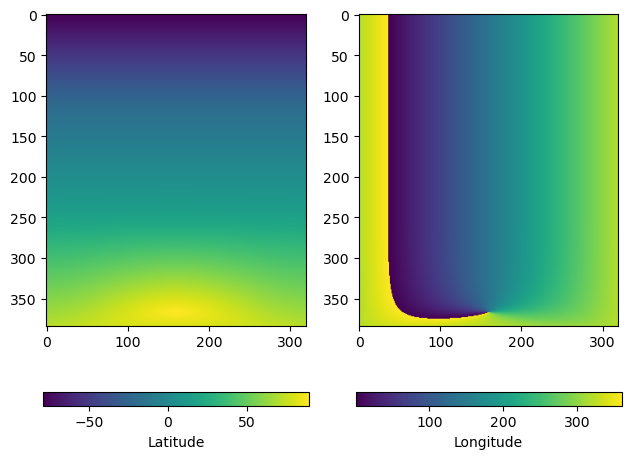

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
plat = ax[0].imshow(test_ds.latitude)
plon = ax[1].imshow(test_ds.longitude)
fig.colorbar(plat, ax=ax[0], orientation="horizontal", label="Latitude")
fig.colorbar(plon, ax=ax[1], orientation="horizontal", label="Longitude")
fig.tight_layout()
plt.show()

In [21]:
test_dir = paths.data / "test"
regrid.regrid_files_by_subdirectory(
    watch_dir=test_dir,
)


🕒 START: 2025-10-10 09:54:59

Scanning directory: /maps-priv/maps/rt582/esgf-download/data/test

Found 2 files to regrid

Skipped 0 files (already processed)

Grouped files into 1 subdirectory...

Processing subdirectory: /maps-priv/maps/rt582/esgf-download/data/test

Files in subdirectory: 2

Weight directory: /maps-priv/maps/rt582/esgf-download/data/test/regrid_weights

Processing file 1/2: so_Omon_TaiESM1_ssp126_r1i1p1f1_gn_201601-201612.nc

Loading dataset...

Dataset loaded, shape: FrozenMappingWarningOnValuesAccess({'time': 12, 'bnds': 2, 'lev': 60, 'j': 384, 'i': 320, 
'vertices': 4})

Creating RegridderManager...

Selected top level of dataset


/maps-priv/maps/rt582/esgf-download/esgpull/esgpullplus/regrid.py:259: UserWarning: rename 'i' to 'y' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  self.ds = self.ds.rename(coord_map)
/maps-priv/maps/rt582/esgf-download/esgpull/esgpullplus/regrid.py:259: UserWarning: rename 'j' to 'x' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  self.ds = self.ds.rename(coord_map)


RegridderManager created

Starting regridding...

Structured grid detected, using xESMF


/maps/rt582/miniforge3/envs/esgplus/lib/python3.11/site-packages/xesmf/backend.py:41: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not F_CONTIGUOUS. ' 'Will affect performance.')
/maps/rt582/miniforge3/envs/esgplus/lib/python3.11/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


Regridding completed

Processing output...

Output processed

Saving to: 
/maps-priv/maps/rt582/esgf-download/data/test/reprojected/so_Omon_TaiESM1_ssp126_r1i1p1f1_gn_201601-201612.nc

File saved

Regridded (xESMF): maps/rt582/esgf-download/data/test/so_Omon_TaiESM1_ssp126_r1i1p1f1_gn_201601-201612.nc

Processing file 2/2: so_Omon_TaiESM1_ssp126_r1i1p1f1_gn_201501-201512.nc

Loading dataset...

Dataset loaded, shape: FrozenMappingWarningOnValuesAccess({'time': 12, 'bnds': 2, 'lev': 60, 'j': 384, 'i': 320, 
'vertices': 4})

Creating RegridderManager...

Selected top level of dataset


/maps-priv/maps/rt582/esgf-download/esgpull/esgpullplus/regrid.py:259: UserWarning: rename 'i' to 'y' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  self.ds = self.ds.rename(coord_map)
/maps-priv/maps/rt582/esgf-download/esgpull/esgpullplus/regrid.py:259: UserWarning: rename 'j' to 'x' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  self.ds = self.ds.rename(coord_map)


RegridderManager created

Starting regridding...

Structured grid detected, using xESMF


/maps/rt582/miniforge3/envs/esgplus/lib/python3.11/site-packages/xesmf/backend.py:41: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not F_CONTIGUOUS. ' 'Will affect performance.')
/maps/rt582/miniforge3/envs/esgplus/lib/python3.11/site-packages/xesmf/backend.py:56: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')


Regridding completed

Processing output...

Output processed

Saving to: 
/maps-priv/maps/rt582/esgf-download/data/test/reprojected/so_Omon_TaiESM1_ssp126_r1i1p1f1_gn_201501-201512.nc

File saved

Regridded (xESMF): maps/rt582/esgf-download/data/test/so_Omon_TaiESM1_ssp126_r1i1p1f1_gn_201501-201512.nc

Regridding Summary:

Successful: 2

Failed: 0

Skipped: 0

Total processed: 2

🕒 END: 2025-10-10 10:50:10

🕒 DURATION: 00:55:11

In [6]:
xa.open_dataset("/maps/rt582/esgf-download/data/test/reprojected/so_Omon_TaiESM1_ssp126_r1i1p1f1_gn_201501-201512.nc")

<xarray.Dataset> Size: 888B
Dimensions:    (time: 12, latitude: 3, longitude: 5)
Coordinates:
  * time       (time) object 96B 2015-01-16 12:00:00 ... 2015-12-16 12:00:00
  * latitude   (latitude) float64 24B -90.0 10.0 110.0
  * longitude  (longitude) float64 40B -180.0 -80.0 20.0 120.0 220.0
    depth      float64 8B ...
Data variables:
    so         (time, latitude, longitude) float32 720B ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          Hybrid-restart from year 2015-01-01 of historical
    branch_time_in_child:   0.0
    branch_time_in_parent:  60225.0
    contact:                Dr. Wei-Liang Lee (leelupin@gate.sinica.edu.tw)
    ...                     ...
    title:                  TaiESM1 output prepared for CMIP6
    variable_id:            so
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by REQUIRED is licensed...
    cmor_version:           3.5.0
    tracking_id:            hdl:21.14100/af13f5c0-1b79-4255-aab7-a8c7b7068492